In this notebook, we will visualize and explain the functionality of gradient boosting classification tree written in model directory, visualize the loss vs interations, evaluate the model on both multi class and binary class and compare the results with predefined models from Sklearn. 

In [ ]:
#Firstly we are going to check our custom model on small iterations to see if it is working

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import sys 
import os

In [4]:

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

try:
    from model.gradientboosting import GradientBoostingClassifier
except ImportError as e:
    print("Import Error Details:")
    print(f"Error: {e}")
    print("Available paths:", sys.path)
    raise

In [5]:
# Loading the Iris dataset
#data = load_breast_cancer()
data = load_iris()
X, y = data.data, data.target

# Splitting into train/test (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(X_train[:5])
print(y_train[:5])

X_train shape: (120, 4), y_train shape: (120,)
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
[0 0 1 0 0]


In [4]:
model = GradientBoostingClassifier(
    n_estimators=10,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    subsample=0.6,
    early_stopping_rounds=10,
    validation_fraction=0.1,
    n_jobs=4
)


In [5]:
model.fit(X_train, y_train)

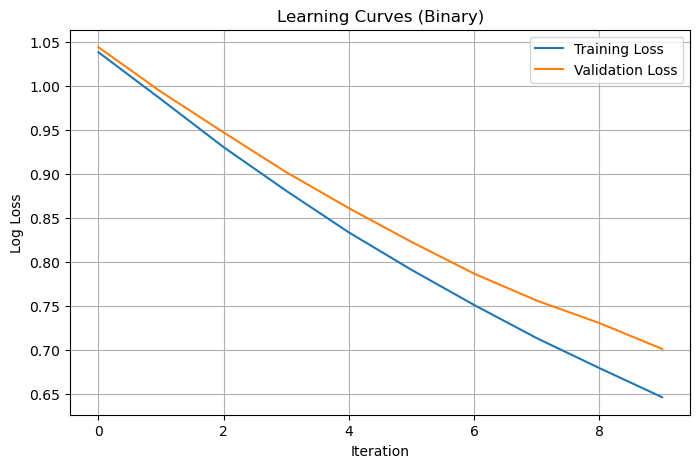

In [6]:
# 1. Plotting learning curves
plt.figure(figsize=(8, 5))
plt.plot(model.training_loss_history, label="Training Loss")
if model.validation_loss_history:
    plt.plot(model.validation_loss_history, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Learning Curves (Binary)")
plt.legend()
plt.grid(True)
plt.show()



In [7]:
print(X_test.shape, y_test.shape)

(30, 4) (30,)


In [8]:
# 2. Evaluating on the test set
metrics = model.evaluate(X_test, y_test)
print("Evaluation metrics on test set:")
for name, val in metrics.items():
    print(f"{name}: {val}")



Evaluation metrics on test set:
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0


In [10]:
# 3. Predicting probabilities and classes on a test sample
sample = X_test[0].reshape(1, -1)
proba = model.predict_proba(sample)
pred = model.predict(sample)[0]
print("\nSingle test sample results:")
print(f"True label: {y_test[0]}")
print(f"Predicted probabilities: {proba}")
print(f"Predicted class: {pred}")




Single test sample results:
True label: 1
Predicted probabilities: [[0.22976712 0.54067625 0.22955663]]
Predicted class: 1


#### We can see the model is working and giving all the responses as expected it to be. Now we will go to the next phase. 

## Comparing our Custom GradientBoostingClassifier with sklearn's GradientBoostingClassifier on breast cancer and iris dataset

In [6]:
try:
    from model.gradientboosting import GradientBoostingClassifier as CustomGB
except ImportError as e:
    print("Import Error Details:")
    print(f"Error: {e}")
    print("Available paths:", sys.path)
    raise


=== Breast Cancer (Binary) Dataset ===


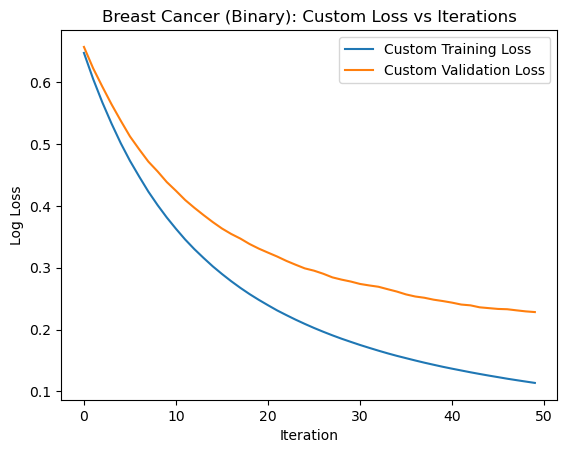

Custom Model Metrics:
Confusion Matrix:
[[40  3]
 [ 2 69]]
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965


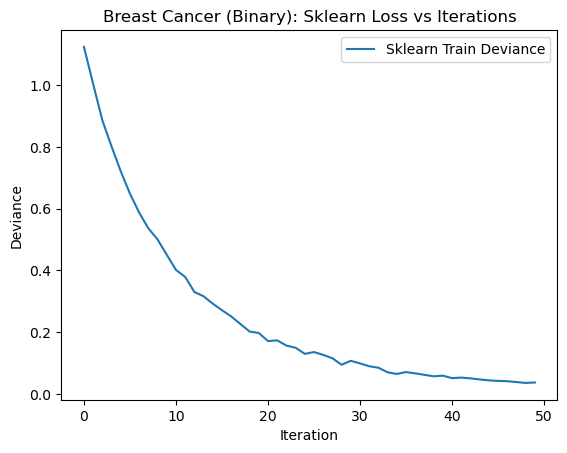


Sklearn Model Metrics:
Confusion Matrix:
[[40  3]
 [ 2 69]]
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965

=== Iris (Multiclass) Dataset ===


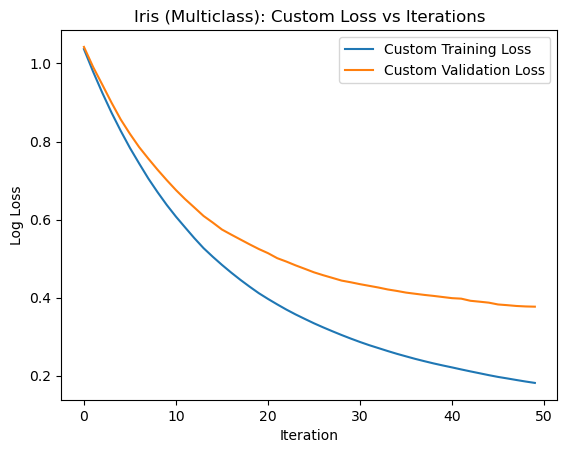

Custom Model Metrics:
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score: 1.0


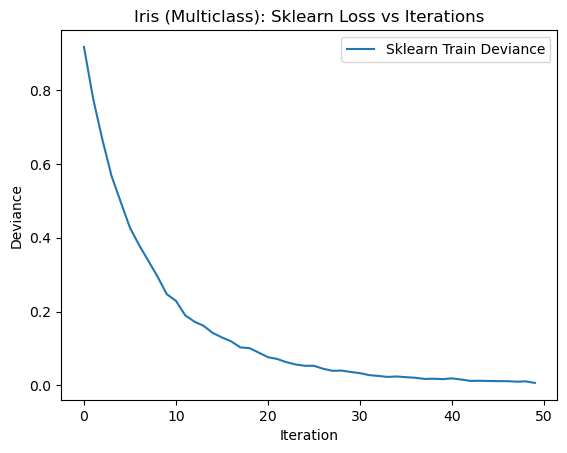


Sklearn Model Metrics:
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score: 1.0


In [7]:

from sklearn.ensemble import GradientBoostingClassifier as SklearnGB
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_compare(X, y, dataset_name):
    print(f"\n=== {dataset_name} Dataset ===")
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Custom model
    custom = CustomGB(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=3,
        min_samples_split=2,
        subsample=0.8,
        n_jobs=4,
        early_stopping_rounds=10,
        validation_fraction=0.1
    )
    custom.fit(X_train, y_train)

    # Plotting custom training loss
    plt.figure()
    plt.plot(custom.training_loss_history, label="Custom Training Loss")
    if custom.validation_loss_history:
        plt.plot(custom.validation_loss_history, label="Custom Validation Loss")
    plt.title(f"{dataset_name}: Custom Loss vs Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.legend()
    plt.show()

    # Evaluate custom
    y_pred_custom = custom.predict(X_test)
    y_proba_custom = custom.predict_proba(X_test)[:, 1] if custom.n_classes_ == 2 else None

    print("Custom Model Metrics:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_custom))
    print("Accuracy:", accuracy_score(y_test, y_pred_custom))
    if custom.n_classes_ == 2:
        print("Precision:", precision_score(y_test, y_pred_custom))
        print("Recall:", recall_score(y_test, y_pred_custom))
    else:
        print("Precision (macro):", precision_score(y_test, y_pred_custom, average='macro'))
        print("Recall (macro):", recall_score(y_test, y_pred_custom, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred_custom, average='binary' if custom.n_classes_==2 else 'macro'))

    # Sklearn model
    sklearn = SklearnGB(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        random_state=42
    )
    sklearn.fit(X_train, y_train)

    # Plotting sklearn training loss (deviance)
    plt.figure()
    plt.plot(sklearn.train_score_, label="Sklearn Train Deviance")
    plt.title(f"{dataset_name}: Sklearn Loss vs Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Deviance")
    plt.legend()
    plt.show()

    # Evaluate sklearn
    y_pred_sklearn = sklearn.predict(X_test)
    print("\nSklearn Model Metrics:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_sklearn))
    print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
    if custom.n_classes_ == 2:
        print("Precision:", precision_score(y_test, y_pred_sklearn))
        print("Recall:", recall_score(y_test, y_pred_sklearn))
    else:
        print("Precision (macro):", precision_score(y_test, y_pred_sklearn, average='macro'))
        print("Recall (macro):", recall_score(y_test, y_pred_sklearn, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred_sklearn, average='binary' if custom.n_classes_==2 else 'macro'))

# Running on binary dataset
data_bin = load_breast_cancer()
evaluate_and_compare(data_bin.data, data_bin.target, "Breast Cancer (Binary)")

# Running on multiclass dataset
data_multi = load_iris()
evaluate_and_compare(data_multi.data, data_multi.target, "Iris (Multiclass)")


#### There is no major difference in the results between our custom gradient boost classifier and the sklearn predefined classifer, which explain the model is working perfect

### Okay, here the gap between validation loss and training loss indicates that the model is overfitting. To prevent overfitting, we can reduce the sub sample size or increase the learning rate to prevent overfitting.

### So, I am gonna do the same analysis, but varying two hyper-parameters, learning rate reduced to 0.05, subsample size reduced to 0.5 and recheck if there is a difference in the validation loss and training curves.


=== Breast Cancer (Binary) Dataset ===


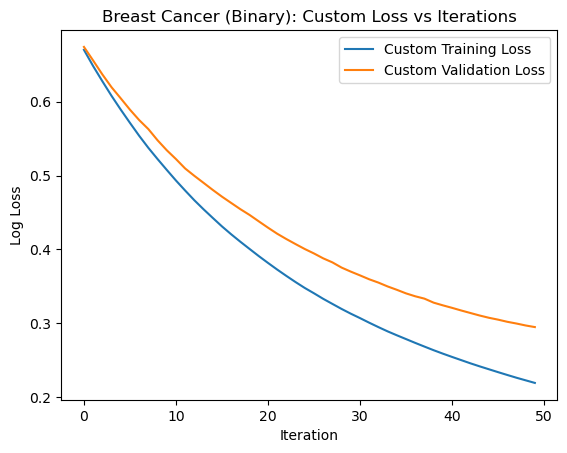

Custom Model Metrics:
Confusion Matrix:
[[40  3]
 [ 2 69]]
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965


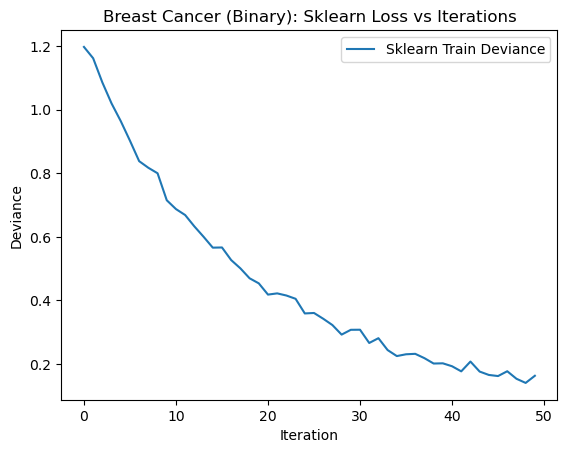


Sklearn Model Metrics:
Confusion Matrix:
[[40  3]
 [ 2 69]]
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965

=== Iris (Multiclass) Dataset ===


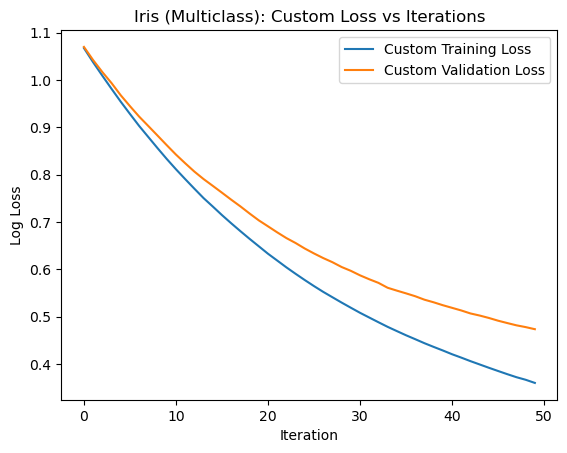

Custom Model Metrics:
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score: 1.0


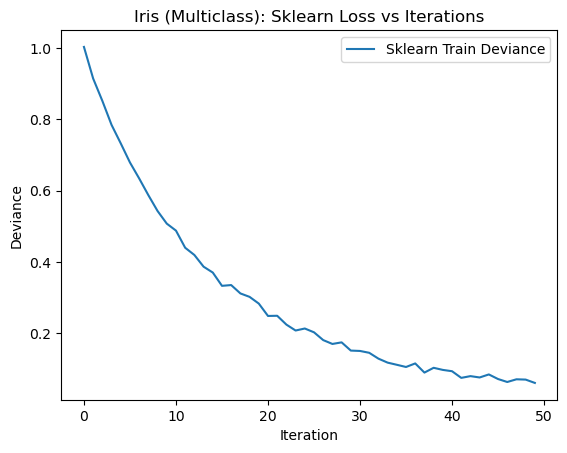


Sklearn Model Metrics:
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score: 1.0


In [9]:

from sklearn.ensemble import GradientBoostingClassifier as SklearnGB
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_compare(X, y, dataset_name):
    print(f"\n=== {dataset_name} Dataset ===")
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Custom model
    custom = CustomGB(
        n_estimators=50,
        learning_rate=0.05,
        max_depth=3,
        min_samples_split=2,
        subsample=0.6,
        n_jobs=4,
        early_stopping_rounds=10,
        validation_fraction=0.1
    )
    custom.fit(X_train, y_train)

    # Plotting custom training loss
    plt.figure()
    plt.plot(custom.training_loss_history, label="Custom Training Loss")
    if custom.validation_loss_history:
        plt.plot(custom.validation_loss_history, label="Custom Validation Loss")
    plt.title(f"{dataset_name}: Custom Loss vs Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.legend()
    plt.show()

    # Evaluate custom
    y_pred_custom = custom.predict(X_test)
    y_proba_custom = custom.predict_proba(X_test)[:, 1] if custom.n_classes_ == 2 else None

    print("Custom Model Metrics:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_custom))
    print("Accuracy:", accuracy_score(y_test, y_pred_custom))
    if custom.n_classes_ == 2:
        print("Precision:", precision_score(y_test, y_pred_custom))
        print("Recall:", recall_score(y_test, y_pred_custom))
    else:
        print("Precision (macro):", precision_score(y_test, y_pred_custom, average='macro'))
        print("Recall (macro):", recall_score(y_test, y_pred_custom, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred_custom, average='binary' if custom.n_classes_==2 else 'macro'))

    # Sklearn model
    sklearn = SklearnGB(
        n_estimators=50,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.6,
        random_state=42
    )
    sklearn.fit(X_train, y_train)

    # Plotting sklearn training loss (deviance)
    plt.figure()
    plt.plot(sklearn.train_score_, label="Sklearn Train Deviance")
    plt.title(f"{dataset_name}: Sklearn Loss vs Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Deviance")
    plt.legend()
    plt.show()

    # Evaluate sklearn
    y_pred_sklearn = sklearn.predict(X_test)
    print("\nSklearn Model Metrics:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_sklearn))
    print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
    if custom.n_classes_ == 2:
        print("Precision:", precision_score(y_test, y_pred_sklearn))
        print("Recall:", recall_score(y_test, y_pred_sklearn))
    else:
        print("Precision (macro):", precision_score(y_test, y_pred_sklearn, average='macro'))
        print("Recall (macro):", recall_score(y_test, y_pred_sklearn, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred_sklearn, average='binary' if custom.n_classes_==2 else 'macro'))

# Running on binary dataset
data_bin = load_breast_cancer()
evaluate_and_compare(data_bin.data, data_bin.target, "Breast Cancer (Binary)")

# Running on multiclass dataset
data_multi = load_iris()
evaluate_and_compare(data_multi.data, data_multi.target, "Iris (Multiclass)")


#### we can observe the reduce in gap between validation curve and accuracy curve in the first 10 iterations, but with increase in iterations, it still lead to over fitting. We believe we can improve these results by reducing the early stopping threshold to 5, setting up adaptive learning rate so it reduces the learning rate as the training progresses and still no significant difference in validation loss of consecutive iterations. We will explain more on this in the readme file while explaining the limitations

## Now we will compare our Custom Gradient boost classifier with random forest imported from sklearn to test on digits for classification from 1 to 10.

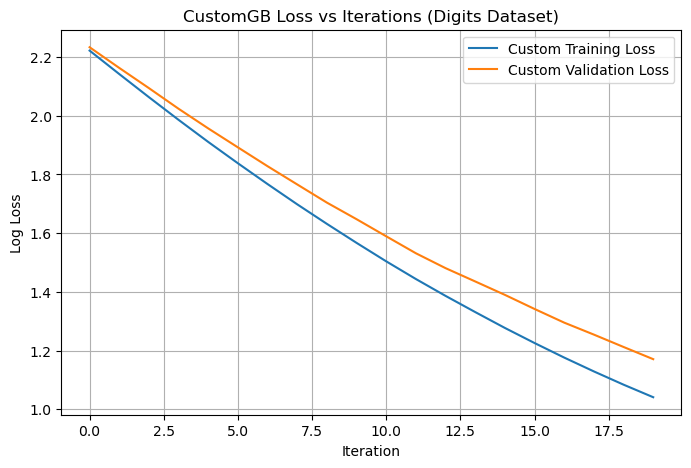

=== CustomGB Metrics ===
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  1]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  0  0  0 44  0  1  0  2]
 [ 0  0  0  1  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  1  2 37]]
Accuracy:  0.9583333333333334
Precision (macro): 0.9567425292602317
Recall (macro):    0.9598504276826365
F1 Score (macro): 0.9580121224621679

=== RandomForest Metrics ===
Confusion Matrix:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 45  0  0  1  0  0]
 [ 0  0  0  0  0 43  1  0  0  3]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  1  0  0  1  1  0  0  0 37]]
Accuracy:  0.9638888888888889
Precision (macro): 0.966048849820943
Recall (macro):    0.96671231649669

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)


# Loading the Digits dataset (multiclass)
digits = load_digits()
X, y = digits.data, digits.target

# Splitting into train/test (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instantiating and fitting the custom gradient boosting (20 iterations)
custom = CustomGB(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    subsample=0.7,
    n_jobs=4,
    early_stopping_rounds=5,
    validation_fraction=0.1
)
custom.fit(X_train, y_train)

# Plotting custom loss vs iterations
plt.figure(figsize=(8, 5))
plt.plot(custom.training_loss_history, label="Custom Training Loss")
if custom.validation_loss_history:
    plt.plot(custom.validation_loss_history, label="Custom Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("CustomGB Loss vs Iterations (Digits Dataset)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluating custom model
y_pred_custom = custom.predict(X_test)
print("=== CustomGB Metrics ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Accuracy: ", accuracy_score(y_test, y_pred_custom))
print("Precision (macro):", precision_score(y_test, y_pred_custom, average='macro'))
print("Recall (macro):   ", recall_score(y_test, y_pred_custom, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_custom, average='macro'))

# Instantiating and fitting RandomForestClassifier (20 trees)
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

# Evaluating RandomForest
y_pred_rf = rf.predict(X_test)
print("\n=== RandomForest Metrics ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision (macro):", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall (macro):   ", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_rf, average='macro'))


##### I am gonna train and test on decisiontreeclassifier to compare three models together. 

In [10]:
from sklearn.tree import DecisionTreeClassifier
# Load the Digits dataset (multiclass)
digits = load_digits()
X, y = digits.data, digits.target

# Split into train/test (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instantiate and fit a Decision Tree
dt = DecisionTreeClassifier(
    # you can tweak parameters here, e.g. max_depth=5, min_samples_split=2, etc.
    random_state=42
)
dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt.predict(X_test)

# Display metrics
print("=== Decision Tree Metrics ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy:             ", accuracy_score(y_test, y_pred_dt))
print("Precision (macro):    ", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall (macro):       ", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score (macro):     ", f1_score(y_test, y_pred_dt, average='macro'))

=== Decision Tree Metrics ===
Confusion Matrix:
 [[29  0  0  0  2  1  0  0  0  1]
 [ 0 22  1  0  1  0  0  1  2  1]
 [ 0  0 24  3  1  1  1  1  2  0]
 [ 0  0  1 29  0  1  0  1  1  1]
 [ 0  0  1  0 42  0  0  2  1  0]
 [ 0  0  1  0  1 40  0  0  1  4]
 [ 1  0  0  0  1  1 32  0  0  0]
 [ 0  0  0  2  1  0  0 31  0  0]
 [ 0  3  0  1  0  1  0  0 21  4]
 [ 0  1  0  3  1  0  0  2  0 33]]
Accuracy:              0.8416666666666667
Precision (macro):     0.8447496596970281
Recall (macro):        0.8359873796461651
F1 Score (macro):      0.8384595552746351


### we can see that all the three models custom GBM, decision tree and random forest have performed well on the digits dataset, which is a multiclass classification problem. But in performance wise, Random forest > Custom Gradient Boost classification > Decision tree, which explain the bagging and choosing the final maximum label has given best results followed by gradient boosting tree. This explains that our gradient boosting classifier is working and capable to train on both multi-class and binary class. 